In [1]:
from sklearn import datasets
import pandas as pd

# TODO: 
* https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html
* https://www.programiz.com/python-programming/methods/built-in/slice

In [4]:
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


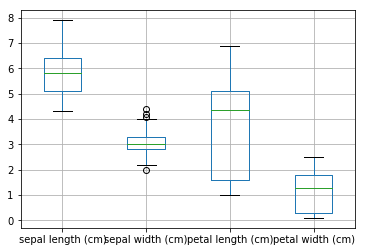

In [13]:
df.boxplot()

In [ ]:

def truc(datax, datay, clf, n_splits=3):
    skf = StratifiedKFold(n_splits=2)
    clf = RandomForestClassifier(n_estimators=5, max_depth=None, min_samples_split=2, n_jobs=-1)

    scores_acc = []
    dim_to_keep_acc = []
    while (len(scores_acc) <= 2) or ((scores_acc[-1] >= scores_acc[-2]) and (len(dim_to_keep_acc) != datax.shape[-1])):    
        scores_acc_dim = np.array([])
        for i_dim in tqdm(range(datax.shape[-1])):
            if i_dim in dim_to_keep_acc:
                scores_acc_dim = np.hstack((scores_acc_dim, -1))
                continue
            sub_datax_acc, sub_datay_acc = datax[:, dim_to_keep_acc + [i_dim]], datay

            score_acc_dim = np.array([])
            for train_index, test_index in skf.split(sub_datax_acc, sub_datay_acc):
                datax_train, datax_test = sub_datax_acc[train_index], sub_datax_acc[test_index]
                datay_train, datay_test = sub_datay_acc[train_index], sub_datay_acc[test_index]
                clf.fit(datax_train, datay_train)

                score_acc_dim = np.hstack((score_acc_dim, clf.score(datax_test, datay_test)))
            scores_acc_dim = np.hstack((scores_acc_dim, score_acc_dim.mean()))
        dim_to_keep_acc.append(scores_acc_dim.argmax())
        scores_acc.append(scores_acc_dim.max())

        print("Iteration :", len(dim_to_keep_ams))
        print(dim_to_keep_acc, scores_acc)
        print(dim_to_keep_ams, scores_ams)